In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [4]:
df.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [5]:
df.shape

(962, 2)

# Exploring Categories

In [6]:
category = df['Category'].value_counts().reset_index()
category

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


C:\Users\aafq7\AppData\Local\Temp\ipykernel_12100\780638571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=category['count'], y=category['Category'], palette='cool')


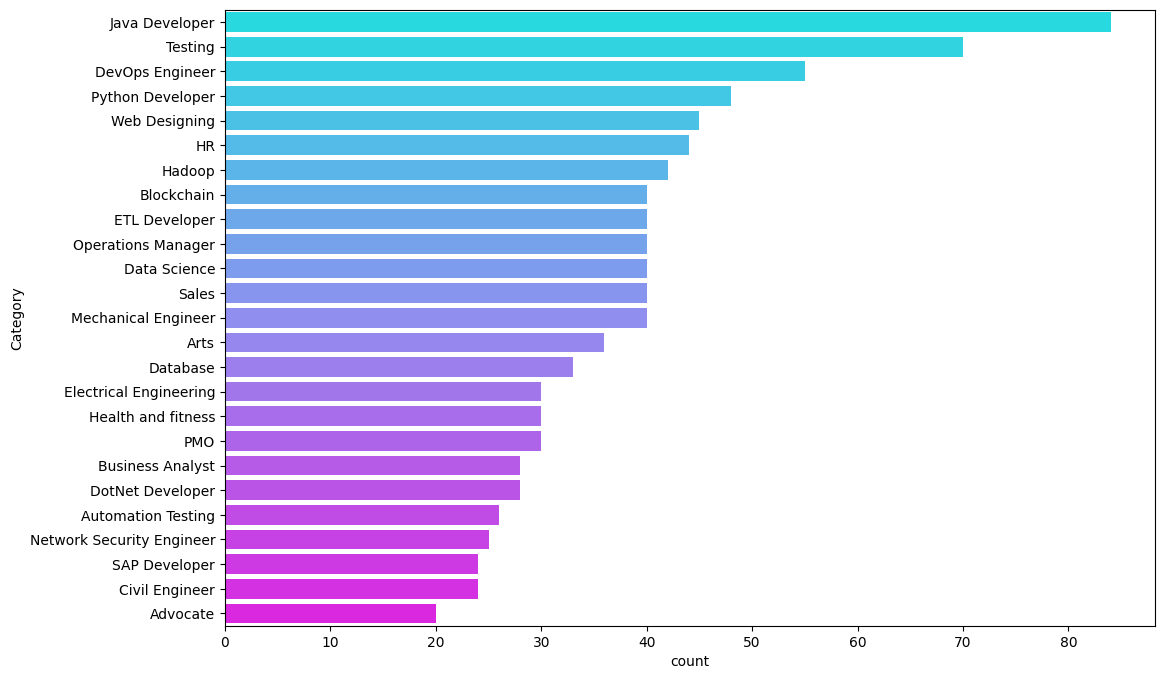

In [7]:
plt.figure(figsize=(12,8))
sns.barplot( x=category['count'], y=category['Category'], palette='cool')
plt.show()

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

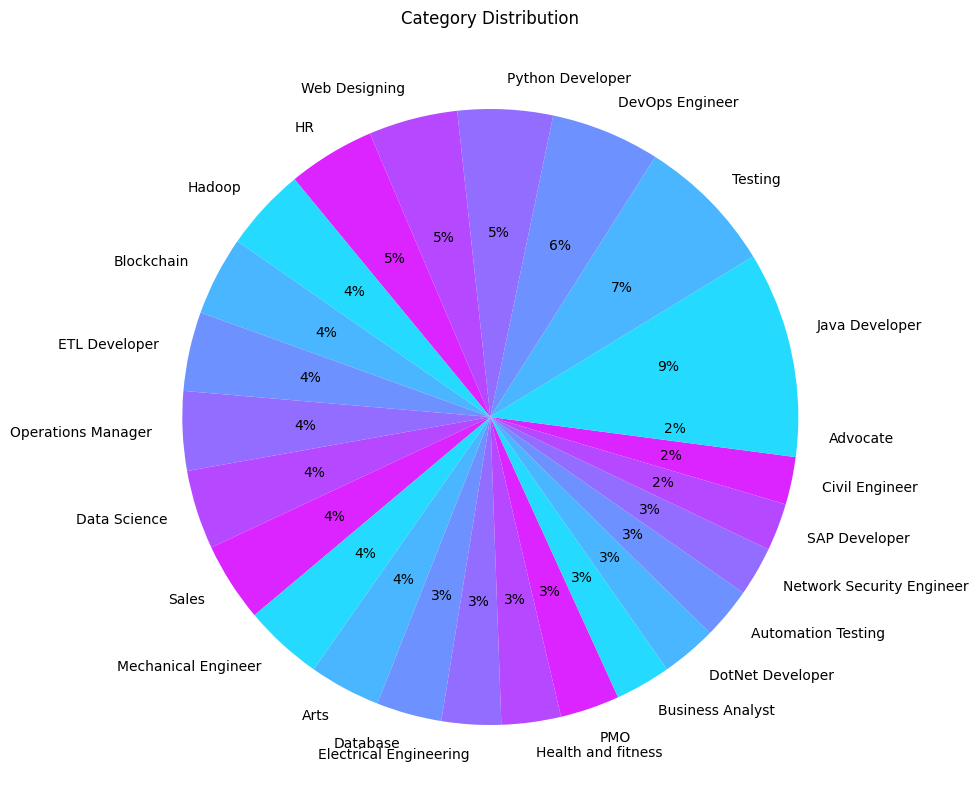

In [9]:
plt.figure(figsize=(13,10))
plt.pie(category['count'], labels = category['Category'],
        colors = sns.color_palette('cool'), autopct = '%.0f%%')
plt.title('Category Distribution')
plt.show()

# Exploring Resume

In [10]:
df['Category'][0]

'Data Science'

In [11]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data

In [16]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [17]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [14]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [15]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# Words into categorical values

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [20]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [75]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

# Vactorization

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

# Splitting

In [36]:
from sklearn.model_selection import train_test_split


In [46]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.3, random_state=20)

In [47]:
X_train.shape

(673, 7351)

In [48]:
X_test.shape

(289, 7351)

# Train model and print classification

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
ypred = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98


In [54]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00        12
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         9
           6       1.00      0.81      0.90        16
           7       1.00      1.00      1.00         9
           8       1.00      0.88      0.94        17
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00        13
          11       0.91      1.00      0.95        10
          12       0.92      1.00      0.96        12
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         9
          15       0.91      1.00      0.

In [51]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

# Prediction system

In [83]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [30]:

myresume = """Key Skills - Requirement Gathering - Requirement Analysis -Design Specifications - Client Communication - System Documentation - Problem solving - SDLC Operating Systems: Windows OS, UNIX (Linux/Ubuntu) Languages: Java, C++ Web Languages: JavaScript, HTML Tools: Citrix Software, System Architect, Quality Center v9.0 & v10.0, Tortoise SVN, DOORS, Artifact Viewer, JformDesigner, JIRA, Microsoft D365 Other Skills: Microsoft Office, MS Excel, MS PowerPoint, MS Visio, AutoCAD, VLSI, MS-CIT Certified. Education Details 
January 2012 BE Electronics Mumbai, Maharashtra Mumbai University
January 2006    Maharashtra State Board
Business Analyst 

Business Analyst - Intertek India Pvt Ltd
Skill Details 
SDLC- Exprience - 75 months
VISIO- Exprience - 60 months
REQUIREMENT GATHERING- Exprience - 15 months
Documentation- Exprience - Less than 1 year months
Functional Testing- Exprience - Less than 1 year months
Business Analysis- Exprience - Less than 1 year months
Jira- Exprience - Less than 1 year monthsCompany Details 
company - Intertek India Pvt Ltd
description - Business Analyst. Key responsibilities include Requirements Gathering, Requirements Analysis. Documentation like FRD creation. Providing KT sessions to the team. Having Client Communication. Gap Analysis.
company - Intertek India Pvt Ltd
description - Requirement Gathering from Businesses. Creating FRDs.
Ã¢ÂœÂ“ Vendor interaction for functional and technical disciplines.
Ã¢ÂœÂ“ Creating Project Plan.
Ã¢ÂœÂ“ Walkthrough to team regarding the requirement Ã¢ÂœÂ“ Change Proposal Management; Effort Estimation, Impact & Gap Analysis Ã¢ÂœÂ“ Actively participate in Change proposal implementation & testing and define ways for improvement / enhancement Ã¢ÂœÂ“ Defect analysis & clarifying functional queries of team members & developers Ã¢ÂœÂ“ Creating UAT Test cases. Executing the same.
Ã¢ÂœÂ“ Test Management: Test Data creation, Test Case writing, Test Case Execution (Manual), Regression tests at various stages in the SDLC

Project Details
Project 1	Inlight (Feb 2018 till date)
Platform	.Net

Description:
Inlight - (Supplier Risk Assessment Application)
Inlight is an Application designed to assess the Suppliers within the Supply chain. The Application on boards the Importers, Exporters and Suppliers. Based on the role they perform a Questionnaire is assigned to them and they fill out the Questionnaire. Basis the answer a scoring methodology is defined and the Suppliers are assessed to be Critical, High, Medium and Low. This helps in assessing the risk involved in working with certain Suppliers in the Supply chain.

Beyond Curriculum Ã¢ÂœÂ“ Completed Internship in L&T Ã¢ÂœÂ“ Attended Logistics Business School Training in Germany.
Ã¢ÂœÂ“ A1 Certified in German Language.
Ã¢ÂœÂ“ Travelled Onsite for Business Meetings and Discussions with Clients.

Personal Dossier .
company - AllCargo India Pvt Ltd
description - FRD creation
Client communication
Vendor Management
Having product Walk through with the team.
company - AllCargo India Pvt Ltd
description - Requirement Gathering from Businesses. Creating BRDs and FSDs.
Ã¢ÂœÂ“ Vendor interaction for functional and technical disciplines.
Ã¢ÂœÂ“ Creating Project Plan.
Ã¢ÂœÂ“ Analyzing business requirements and defining consistent, correct and complete specification Ã¢ÂœÂ“ Change Proposal Management; Effort Estimation, Impact & Gap Analysis Ã¢ÂœÂ“ Actively participate in Change proposal implementation & testing and define ways for improvement / enhancement Ã¢ÂœÂ“ Defect analysis & clarifying functional queries of team members & developers Ã¢ÂœÂ“ Prepare Requirement document, User manual, Test cases and training material Ã¢ÂœÂ“ Test Management: Test Data creation, Test Case writing, Test Case Execution (Manual), Regression tests at various stages in the SDLC

Project Details
Project 1	CRM (Nov 2017 to Feb 2018)
Platform	Microsoft D365

Description:
CRM - (Sales Management System)
CRM is a Software solution specially designed for handling Sales Management. This is a product provided by Microsoft which helps in tracking the sales of company, the activities of the salesperson, 360-degree view of customer accounts. This basically helps to get the overall status and view of various businesses the company is achieving from different Customers. A platform where the salesperson provides the details of Lead, Opportunity, Accounts and Businesses. Available on Cloud.

Project 2	Credit Risk (Nov 2017 to Feb 2018)
Platform	.Net

Description:
Credit Risk - (Customer credit check Management System)
Credit Risk is a Software solution specially designed for checking the credit status of the customer from which businesses are gained. The software basically is designed to take the KYC and the consent from the customer. For those customers who provide the consent, the credit report and monitoring report are obtained from the Credit Bureau. Based on the reports the customer health can be determined and business with them can either be  or discontinued.

Work Experience 3:
company - Capgemini India Pvt Ltd
description - Client: DB Schenker Ã¢ÂœÂ“ Analyzing business requirements and defining consistent, correct and complete specification Ã¢ÂœÂ“ Change Proposal Management; Effort Estimation, Impact & Gap Analysis Ã¢ÂœÂ“ Actively participate in Change proposal implementation & testing and define ways for improvement / enhancement Ã¢ÂœÂ“ Defect analysis & clarifying functional queries of team members & developers Ã¢ÂœÂ“ Prepare Requirement document, User manual, Test cases and training material Ã¢ÂœÂ“ Impart business process knowledge transfer to the team members. Prepare business / functional process workflow using Visio, UML etc Ã¢ÂœÂ“ Working knowledge of OOAD - Object Oriented Analysis & Design concept.
Ã¢ÂœÂ“ Helping the Junior BAs in their work. Supervising their work.
Ã¢ÂœÂ“ Tools & Applications: System Architect, DOORS, UML designs & concepts, HP Quality Center, MWB, Jformdesigner Ã¢ÂœÂ“ Test Management: Test Data creation, Test Case writing, Test Case Execution (Manual), Regression tests at various stages in the SDLC

Project Details
company - Capgemini India Pvt Ltd
description - Platform	Java

Description:
TANGO - (Sea & Air Cargo Management System)
TANGO is a Software solution specially designed for handling sea and air cargo (Import & Export) Management. TANGO manages the creation of Shipment, Tracking the shipment via multiple service legs i.e. Pick-up, Delivery leg etc. It helps in managing the end to end shipment with respect to the entire department involvement (globally)

Work Experience 2:
company - Capgemini India Pvt Ltd
description - 
"""

In [31]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl','rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Business Analyst
4
